In [20]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.2


In [21]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

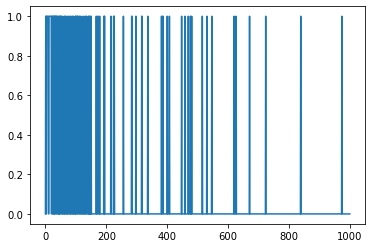

In [22]:
plt.plot(train_data[0])

In [23]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6092 - accuracy: 0.6624 - binary_crossentropy: 0.6092 - val_loss: 0.4551 - val_accuracy: 0.8086 - val_binary_crossentropy: 0.4551
Epoch 2/20
49/49 - 0s - loss: 0.3797 - accuracy: 0.8394 - binary_crossentropy: 0.3797 - val_loss: 0.3456 - val_accuracy: 0.8560 - val_binary_crossentropy: 0.3456
Epoch 3/20
49/49 - 0s - loss: 0.3203 - accuracy: 0.8679 - binary_crossentropy: 0.3203 - val_loss: 0.3307 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3307
Epoch 4/20
49/49 - 0s - loss: 0.3047 - accuracy: 0.8751 - binary_crossentropy: 0.3047 - val_loss: 0.3293 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3293
Epoch 5/20
49/49 - 0s - loss: 0.2970 - accuracy: 0.8793 - binary_crossentropy: 0.2970 - val_loss: 0.3274 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3274
Epoch 6/20
49/49 - 0s - loss: 0.2893 - accuracy: 0.8806 - binary_crossentropy: 0.2893 - val_loss: 0.3279 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3279
Epoch 7/20
49/49 - 0s - loss

In [25]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [26]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6500 - accuracy: 0.6257 - binary_crossentropy: 0.6500 - val_loss: 0.5553 - val_accuracy: 0.7652 - val_binary_crossentropy: 0.5553
Epoch 2/20
49/49 - 0s - loss: 0.4684 - accuracy: 0.8114 - binary_crossentropy: 0.4684 - val_loss: 0.4121 - val_accuracy: 0.8354 - val_binary_crossentropy: 0.4121
Epoch 3/20
49/49 - 0s - loss: 0.3730 - accuracy: 0.8519 - binary_crossentropy: 0.3730 - val_loss: 0.3605 - val_accuracy: 0.8520 - val_binary_crossentropy: 0.3605
Epoch 4/20
49/49 - 0s - loss: 0.3340 - accuracy: 0.8660 - binary_crossentropy: 0.3340 - val_loss: 0.3419 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3419
Epoch 5/20
49/49 - 0s - loss: 0.3167 - accuracy: 0.8698 - binary_crossentropy: 0.3167 - val_loss: 0.3326 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3326
Epoch 6/20
49/49 - 0s - loss: 0.3074 - accuracy: 0.8743 - binary_crossentropy: 0.3074 - val_loss: 0.3357 - val_accuracy: 0.8565 - val_binary_crossentropy: 0.3357
Epoch 7/20
49/49 - 0s - loss

In [27]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [28]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4300 - accuracy: 0.7956 - binary_crossentropy: 0.4300 - val_loss: 0.3363 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3363
Epoch 2/20
49/49 - 0s - loss: 0.2921 - accuracy: 0.8792 - binary_crossentropy: 0.2921 - val_loss: 0.3328 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3328
Epoch 3/20
49/49 - 0s - loss: 0.2275 - accuracy: 0.9117 - binary_crossentropy: 0.2275 - val_loss: 0.3447 - val_accuracy: 0.8556 - val_binary_crossentropy: 0.3447
Epoch 4/20
49/49 - 0s - loss: 0.1192 - accuracy: 0.9614 - binary_crossentropy: 0.1192 - val_loss: 0.4092 - val_accuracy: 0.8484 - val_binary_crossentropy: 0.4092
Epoch 5/20
49/49 - 0s - loss: 0.0334 - accuracy: 0.9935 - binary_crossentropy: 0.0334 - val_loss: 0.5164 - val_accuracy: 0.8496 - val_binary_crossentropy: 0.5164
Epoch 6/20
49/49 - 0s - loss: 0.0069 - accuracy: 0.9995 - binary_crossentropy: 0.0069 - val_loss: 0.6028 - val_accuracy: 0.8506 - val_binary_crossentropy: 0.6028
Epoch 7/20
49/49 - 0s - loss

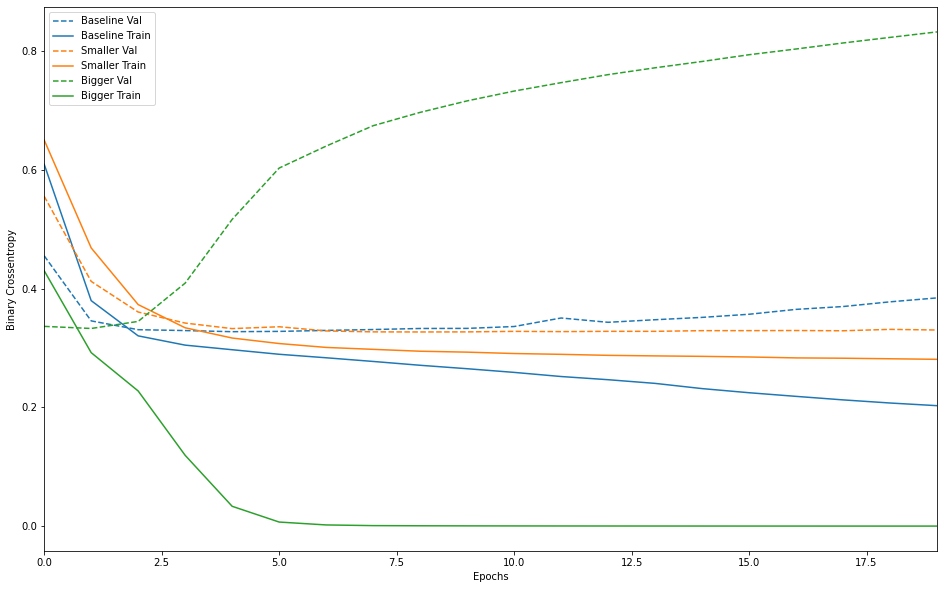

In [30]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [31]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6288 - accuracy: 0.7141 - binary_crossentropy: 0.5826 - val_loss: 0.4824 - val_accuracy: 0.8195 - val_binary_crossentropy: 0.4376
Epoch 2/20
49/49 - 0s - loss: 0.4175 - accuracy: 0.8459 - binary_crossentropy: 0.3727 - val_loss: 0.3899 - val_accuracy: 0.8550 - val_binary_crossentropy: 0.3456
Epoch 3/20
49/49 - 0s - loss: 0.3676 - accuracy: 0.8657 - binary_crossentropy: 0.3240 - val_loss: 0.3746 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3318
Epoch 4/20
49/49 - 0s - loss: 0.3530 - accuracy: 0.8737 - binary_crossentropy: 0.3111 - val_loss: 0.3710 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3300
Epoch 5/20
49/49 - 0s - loss: 0.3463 - accuracy: 0.8740 - binary_crossentropy: 0.3062 - val_loss: 0.3715 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3321
Epoch 6/20
49/49 - 0s - loss: 0.3417 - accuracy: 0.8752 - binary_crossentropy: 0.3031 - val_loss: 0.3680 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3301
Epoch 7/20
49/49 - 0s - loss

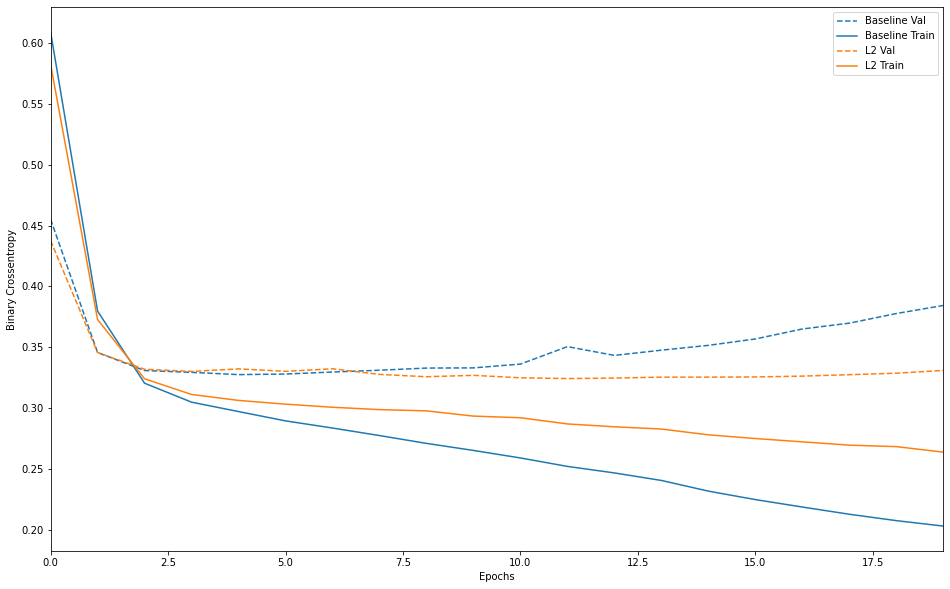

In [32]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [33]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6857 - accuracy: 0.5528 - binary_crossentropy: 0.6857 - val_loss: 0.6562 - val_accuracy: 0.7106 - val_binary_crossentropy: 0.6562
Epoch 2/20
49/49 - 0s - loss: 0.6210 - accuracy: 0.6684 - binary_crossentropy: 0.6210 - val_loss: 0.5340 - val_accuracy: 0.8133 - val_binary_crossentropy: 0.5340
Epoch 3/20
49/49 - 0s - loss: 0.5212 - accuracy: 0.7641 - binary_crossentropy: 0.5212 - val_loss: 0.4205 - val_accuracy: 0.8405 - val_binary_crossentropy: 0.4205
Epoch 4/20
49/49 - 0s - loss: 0.4577 - accuracy: 0.8065 - binary_crossentropy: 0.4577 - val_loss: 0.3744 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.3744
Epoch 5/20
49/49 - 0s - loss: 0.4229 - accuracy: 0.8275 - binary_crossentropy: 0.4229 - val_loss: 0.3533 - val_accuracy: 0.8549 - val_binary_crossentropy: 0.3533
Epoch 6/20
49/49 - 0s - loss: 0.4035 - accuracy: 0.8366 - binary_crossentropy: 0.4035 - val_loss: 0.3433 - val_accuracy: 0.8552 - val_binary_crossentropy: 0.3433
Epoch 7/20
49/49 - 0s - loss

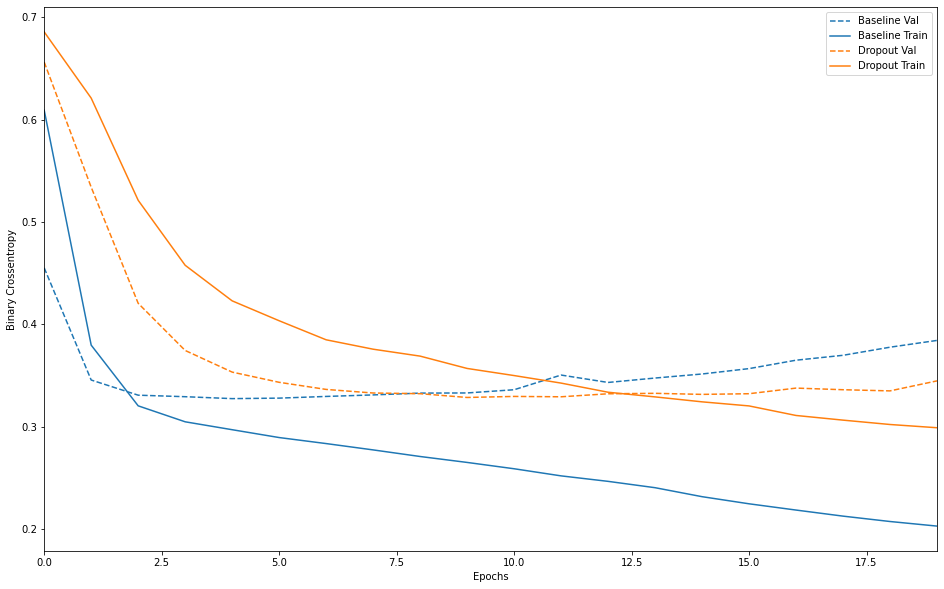

In [34]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])